## ANFIS: Adaptive Neuro-Fuzzy Inference System


### Theoretical Foundation

ANFIS combines neural networks' learning capability with fuzzy logic's reasoning power. The system approximates nonlinear functions through a collection of fuzzy if-then rules while adapting parameters through gradient descent and least squares estimation.

### Network Architecture

Our ANFIS implementation follows a 5-layer structure:

1. **Input Layer**: Raw feature vector $\mathbf{x} = [x_1, x_2, \ldots, x_F]$
2. **Fuzzification Layer**: Converts inputs to fuzzy membership degrees
3. **Product Layer**: Computes rule firing strengths (handled implicitly)
4. **Normalization Layer**: Normalizes firing strengths
5. **Defuzzification Layer**: Produces crisp output through linear combination

Each layer performs specific mathematical transformations that collectively implement Takagi-Sugeno fuzzy inference.

### Mathematical Formulation

#### Gaussian Membership Functions
For cluster $j$ and feature $i$:
$$\mu_{ji}(x_i) = \exp\left(-\frac{(x_i - c_{ji})^2}{2\sigma_{ji}^2}\right)$$

where $c_{ji}$ is the center and $\sigma_{ji}$ is the standard deviation.

#### Rule Firing Strength
The firing strength of rule $j$ for sample $\mathbf{x}$ using product t-norm:
$$w_j(\mathbf{x}) = \prod_{i=1}^F \mu_{ji}(x_i) = \exp\left(-\sum_{i=1}^F \frac{(x_i - c_{ji})^2}{2\sigma_{ji}^2}\right)$$

#### Normalized Firing Strength
$$\bar{w}_j(\mathbf{x}) = \frac{w_j(\mathbf{x})}{\sum_{k=1}^K w_k(\mathbf{x})}$$

where $K$ is the number of rules/clusters.

#### System Output
The final output combines normalized firing strengths with consequent parameters:
$$y(\mathbf{x}) = \sum_{j=1}^K \bar{w}_j(\mathbf{x}) \cdot f_j = \sum_{j=1}^K \bar{w}_j(\mathbf{x}) \cdot w_j + b$$

where $w_j$ are consequent weights and $b$ is the bias term.

### Parameter Learning

#### Least Squares Estimation (Consequent Parameters)
Given normalized firing strengths $\bar{w}_j$ for all training samples, we solve:
$$\mathbf{A}\boldsymbol{\theta} = \mathbf{y}$$

where:
- $\mathbf{A} = [\mathbf{1} \mid \mathbf{W}]$ is the design matrix ($N \times (K+1)$)
- $\mathbf{W}$ contains normalized firing strengths ($N \times K$)
- $\boldsymbol{\theta} = [b, w_1, w_2, \ldots, w_K]^T$ are the parameters
- $\mathbf{y}$ is the target vector

Solution: $\boldsymbol{\theta} = (\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T\mathbf{y}$

#### Gradient Descent (Premise Parameters)
For centers and standard deviations, we minimize MSE: $E = \frac{1}{2N}\sum_{n=1}^N (y_n - \hat{y}_n)^2$

**Center Updates:**
$$\frac{\partial E}{\partial c_{ji}} = -\frac{1}{N}\sum_{n=1}^N (y_n - \hat{y}_n) \frac{\partial \hat{y}_n}{\partial c_{ji}}$$

Using chain rule:
$$\frac{\partial \hat{y}_n}{\partial c_{ji}} = \frac{\partial \hat{y}_n}{\partial \bar{w}_j} \frac{\partial \bar{w}_j}{\partial w_j} \frac{\partial w_j}{\partial c_{ji}}$$

where:
- $\frac{\partial \hat{y}_n}{\partial \bar{w}_j} = w_j$
- $\frac{\partial w_j}{\partial c_{ji}} = w_j \cdot \frac{x_{ni} - c_{ji}}{\sigma_{ji}^2}$

**Standard Deviation Updates:**
$$\frac{\partial E}{\partial \sigma_{ji}} = -\frac{1}{N}\sum_{n=1}^N (y_n - \hat{y}_n) w_j \cdot w_j \cdot \frac{(x_{ni} - c_{ji})^2}{\sigma_{ji}^3}$$

### Vectorization and Broadcasting

#### Computational Advantages

Traditional implementation requires nested loops: $O(N \times K \times F)$ sequential operations. Our vectorized approach performs the same computation in parallel using NumPy's optimized C backend.

**Key Broadcasting Operations:**
1. **Membership Computation**: $(N,1,F) - (1,K,F) \rightarrow (N,K,F)$
2. **Gradient Calculation**: $(N,1,1) \times (N,K,F) \rightarrow (N,K,F)$
3. **Parameter Updates**: Aggregate over sample dimension efficiently

#### Performance Benefits
**Speed Improvement**: Typically 10-100x faster than equivalent loop-based implementation, depending on dataset size and hardware capabilities.

#### Memory Efficiency

Broadcasting enables in-place operations and reduces intermediate array creation. The $(N,K,F)$ tensor for differences is computed once and reused for both membership evaluation and gradient computation, minimizing memory allocation overhead.


$$
\mu_{ik} = \frac{
    \exp\left(-\sum_{d=1}^D \frac{(x_{id} - c_{kd})^2}{2 s_{kd}^2} \right)
}{
    \sum_{j=1}^K \exp\left(-\sum_{d=1}^D \frac{(x_{id} - c_{jd})^2}{2 s_{jd}^2} \right)
}
$$

## ANFIS - zero order, Kmeans initialization for centers and fixed std

Epoch 1, Train MSE: 6.1017, Val MSE: 6.6081
Epoch 2, Train MSE: 6.0701, Val MSE: 6.5770
Epoch 3, Train MSE: 6.0389, Val MSE: 6.5463
Epoch 4, Train MSE: 6.0079, Val MSE: 6.5160
Epoch 5, Train MSE: 5.9771, Val MSE: 6.4861
Epoch 6, Train MSE: 5.9465, Val MSE: 6.4566
Epoch 7, Train MSE: 5.9160, Val MSE: 6.4276
Epoch 8, Train MSE: 5.8857, Val MSE: 6.3988
Epoch 9, Train MSE: 5.8555, Val MSE: 6.3705
Epoch 10, Train MSE: 5.8253, Val MSE: 6.3424
Epoch 11, Train MSE: 5.7952, Val MSE: 6.3147
Epoch 12, Train MSE: 5.7650, Val MSE: 6.2872
Epoch 13, Train MSE: 5.7349, Val MSE: 6.2601
Epoch 14, Train MSE: 5.7046, Val MSE: 6.2331
Epoch 15, Train MSE: 5.6741, Val MSE: 6.2064
Epoch 16, Train MSE: 5.6435, Val MSE: 6.1798
Epoch 17, Train MSE: 5.6126, Val MSE: 6.1534
Epoch 18, Train MSE: 5.5815, Val MSE: 6.1270
Epoch 19, Train MSE: 5.5502, Val MSE: 6.1007
Epoch 20, Train MSE: 5.5186, Val MSE: 6.0745
Epoch 21, Train MSE: 5.4867, Val MSE: 6.0483
Epoch 22, Train MSE: 5.4546, Val MSE: 6.0221
Epoch 23, Train MSE

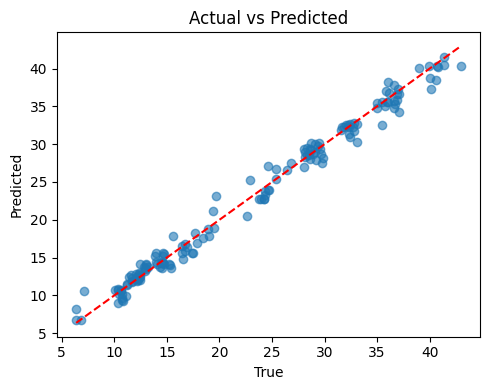

In [11]:
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  

data = pd.read_excel("ENB2012_data.xlsx")

class ANFIS:
    def __init__(self, n_clusters, X): # X input data shape (N, F)
        self.n_clusters, self.n_features = n_clusters, X.shape[1]  # set sizes
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)  # init clusters
        self.centers = kmeans.cluster_centers_  # center shape (K, F)
        self.stds = np.full((n_clusters, X.shape[1]), 1)  # shape (K, F)


    def _membership(self, X):
        diffs = X[:, None, :] - self.centers[None, :, :]  # broadcast diff
        sq = diffs**2 / (2 * self.stds[None, :, :]**2)  # Distance
        M = np.exp(-sq.sum(axis=2))  # sum over features resize-> (N,K)
        return M / M.sum(axis=1, keepdims=True)  # normalize memberships

    def fit(self, X, y, Xv, yv, epochs=100, lr=1e-4, patience=20):
        N = X.shape[0]
        best_mse, wait = np.inf, 0  # early-stopping trackers
        for ep in range(epochs):
            M = self._membership(X)  # (N,K)
            theta = np.linalg.lstsq(M, y, rcond=None)[0]  # solve Θ = argmin||MΘ−y||
            self.w = theta  # consequent weights only
            y_pred = M @ self.w  # model output
            mse = mean_squared_error(y, y_pred)  # train MSE

            Mv = self._membership(Xv)  # val memberships
            val_mse = mean_squared_error(yv, Mv @ self.w)  # val MSE
            print(f"Epoch {ep+1}, Train MSE: {mse:.4f}, Val MSE: {val_mse:.4f}", flush=True)

            err = (y - y_pred)[:, None, None]  # (N,1,1) error broadcast
            diffs = X[:, None, :] - self.centers[None, :, :]  # reuse diffs
            dM_dc = M[:,:,None] * diffs / (self.stds[None,:,:]**2)  # ∂M/∂c
            dM_ds = M[:,:,None] * diffs**2 / (self.stds[None,:,:]**3)  # ∂M/∂σ
            dY_dc = dM_dc * self.w[None,:,None]  # ∂y/∂c
            dY_ds = dM_ds * self.w[None,:,None]  # ∂y/∂σ
            grad_c = -2/N * (err * dY_dc).sum(axis=0)  # mean grad centers
            grad_s = -2/N * (err * dY_ds).sum(axis=0)  # mean grad stds
            grad_c = np.clip(grad_c, -1,1)  # stability clip
            grad_s = np.clip(grad_s, -0.5,0.5)

            self.centers -= lr * grad_c  # update means
            self.stds = np.maximum(self.stds - lr * grad_s, 0.1)  # update stds

            if val_mse < best_mse:
                best_mse, wait = val_mse, 0
            else:
                wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {ep+1}, best Val MSE: {best_mse:.4f}", flush=True)
                break

    def predict(self, X):
        M = self._membership(X)  # get fuzzy memberships
        return M @ self.w  # weighted sum without bias

    def test(self, X, y):
        y_pred = self.predict(X)  # predict test set
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        print(f"Test MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}", flush=True)

        plt.figure(figsize=(5, 4))
        plt.scatter(y, y_pred, alpha=0.6)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
        plt.title('Actual vs Predicted')
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.tight_layout()
        plt.show()

        return mse, rmse, mae, r2 

if __name__ == '__main__':
    df = data  # load data
    X = df.iloc[:,:8].values; y = df.iloc[:,8].values  # features & target
    Xt, Xs, yt, ys = train_test_split(X, y, test_size=0.2, random_state=42)
    sc = StandardScaler().fit(Xt); Xt, Xs = sc.transform(Xt), sc.transform(Xs)  # scale
    Xtr, Xv, ytr, yv = train_test_split(Xt, yt, test_size=0.1, random_state=42)

    model = ANFIS(n_clusters=50, X=Xtr)  # init ANFIS
    model.fit(Xtr, ytr, Xv, yv, epochs=200, lr=0.01, patience=15)  # train
    model.test(Xs, ys)  # evaluate

## ANFIS - zero order, Kmeans initialization for centers and learned std

Epoch 1, Train MSE: 6.1017, Val MSE: 6.6081
Epoch 2, Train MSE: 6.0701, Val MSE: 6.5770
Epoch 3, Train MSE: 6.0389, Val MSE: 6.5463
Epoch 4, Train MSE: 6.0079, Val MSE: 6.5160
Epoch 5, Train MSE: 5.9771, Val MSE: 6.4861
Epoch 6, Train MSE: 5.9465, Val MSE: 6.4566
Epoch 7, Train MSE: 5.9160, Val MSE: 6.4276
Epoch 8, Train MSE: 5.8857, Val MSE: 6.3988
Epoch 9, Train MSE: 5.8555, Val MSE: 6.3705
Epoch 10, Train MSE: 5.8253, Val MSE: 6.3424
Epoch 11, Train MSE: 5.7952, Val MSE: 6.3147
Epoch 12, Train MSE: 5.7650, Val MSE: 6.2872
Epoch 13, Train MSE: 5.7349, Val MSE: 6.2601
Epoch 14, Train MSE: 5.7046, Val MSE: 6.2331
Epoch 15, Train MSE: 5.6741, Val MSE: 6.2064
Epoch 16, Train MSE: 5.6435, Val MSE: 6.1798
Epoch 17, Train MSE: 5.6126, Val MSE: 6.1534
Epoch 18, Train MSE: 5.5815, Val MSE: 6.1270
Epoch 19, Train MSE: 5.5502, Val MSE: 6.1007
Epoch 20, Train MSE: 5.5186, Val MSE: 6.0745
Epoch 21, Train MSE: 5.4867, Val MSE: 6.0483
Epoch 22, Train MSE: 5.4546, Val MSE: 6.0221
Epoch 23, Train MSE

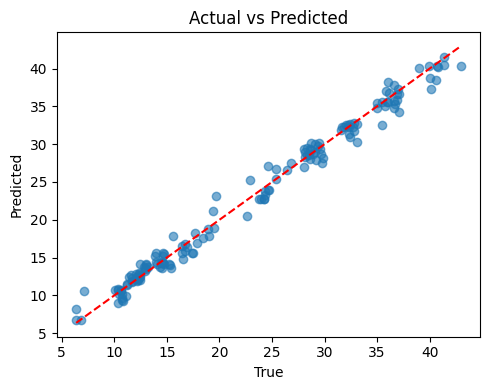

In [ ]:
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  

data = pd.read_excel("ENB2012_data.xlsx")

class ANFIS:
    def __init__(self, n_clusters, X): # X input data shape (N, F)
        self.n_clusters, self.n_features = n_clusters, X.shape[1]  # set sizes
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)  # init clusters
        self.centers = kmeans.cluster_centers_  # center shape (K, F)
        labels      = kmeans.labels_               # (N,)
        diffs = X[:, None, :] - self.centers[None, :, :] # N, K, F)
        one_hot = np.eye(self.n_clusters, dtype=bool)[labels]  # (N, K)
        mask = (~one_hot[:, :, None]).repeat(self.n_features, axis=2) # (N,K,F)
        raw_stds = np.ma.array(diffs, mask=mask).std(axis=0).filled(0)
        self.stds = np.maximum(raw_stds, 1)


    def _membership(self, X):
        diffs = X[:, None, :] - self.centers[None, :, :]  # broadcast diff
        sq = diffs**2 / (2 * self.stds[None, :, :]**2)  # Distance
        M = np.exp(-sq.sum(axis=2))  # sum over features resize-> (N,K)
        return M / M.sum(axis=1, keepdims=True)  # normalize memberships

    def fit(self, X, y, Xv, yv, epochs=100, lr=1e-4, patience=20):
        N = X.shape[0]
        best_mse, wait = np.inf, 0  # early-stopping trackers
        for ep in range(epochs):
            M = self._membership(X)  # (N,K)
            theta = np.linalg.lstsq(M, y, rcond=None)[0]  # solve Θ = argmin||MΘ−y||, shape (K,)
            self.w = theta  # consequent weights only
            y_pred = M @ self.w  # model output, @ matrix multiplication operator, (N,)
            mse = mean_squared_error(y, y_pred)  # train MSE

            Mv = self._membership(Xv)  # val memberships
            val_mse = mean_squared_error(yv, Mv @ self.w)  # val MSE
            print(f"Epoch {ep+1}, Train MSE: {mse:.4f}, Val MSE: {val_mse:.4f}", flush=True)

            err = (y - y_pred)[:, None, None]  # (N,1,1) error broadcast
            diffs = X[:, None, :] - self.centers[None, :, :]  # reuse diffs
            dM_dc = M[:,:,None] * diffs / (self.stds[None,:,:]**2)  # ∂M/∂c
            dM_ds = M[:,:,None] * diffs**2 / (self.stds[None,:,:]**3)  # ∂M/∂σ
            dY_dc = dM_dc * self.w[None,:,None]  # ∂y/∂c
            dY_ds = dM_ds * self.w[None,:,None]  # ∂y/∂σ
            grad_c = -2/N * (err * dY_dc).sum(axis=0)  # mean grad centers
            grad_s = -2/N * (err * dY_ds).sum(axis=0)  # mean grad stds
            grad_c = np.clip(grad_c, -1,1)  # stability clip
            grad_s = np.clip(grad_s, -0.5,0.5)

            self.centers -= lr * grad_c  # update means
            self.stds = np.maximum(self.stds - lr * grad_s, 0.1)  # update stds

            if val_mse < best_mse:
                best_mse, wait = val_mse, 0
            else:
                wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {ep+1}, best Val MSE: {best_mse:.4f}", flush=True)
                break

    def predict(self, X):
        M = self._membership(X)  # get fuzzy memberships
        return M @ self.w  # weighted sum without bias

    def test(self, X, y):
        y_pred = self.predict(X)  # predict test set
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        print(f"Test MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}", flush=True)

        plt.figure(figsize=(5, 4))
        plt.scatter(y, y_pred, alpha=0.6)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
        plt.title('Actual vs Predicted')
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.tight_layout()
        plt.show()

        return mse, rmse, mae, r2 

if __name__ == '__main__':
    df = data  # load data
    X = df.iloc[:,:8].values; y = df.iloc[:,8].values  # features & target
    Xt, Xs, yt, ys = train_test_split(X, y, test_size=0.2, random_state=42)
    sc = StandardScaler().fit(Xt); Xt, Xs = sc.transform(Xt), sc.transform(Xs)  # scale
    Xtr, Xv, ytr, yv = train_test_split(Xt, yt, test_size=0.1, random_state=42)

    model = ANFIS(n_clusters=50, X=Xtr)  # init ANFIS
    model.fit(Xtr, ytr, Xv, yv, epochs=200, lr=0.01, patience=15)  # train
    model.test(Xs, ys)  # evaluate

## ANFIS - zero order, FCM initialization

Epoch 1, Train MSE: 4.4436, Val MSE: 4.4120
Epoch 2, Train MSE: 0.9058, Val MSE: 1.3309
Epoch 3, Train MSE: 2.6716, Val MSE: 3.1164
Epoch 4, Train MSE: 2.3091, Val MSE: 3.1305
Epoch 5, Train MSE: 1.1875, Val MSE: 1.5666
Epoch 6, Train MSE: 0.8354, Val MSE: 1.2932
Epoch 7, Train MSE: 0.9509, Val MSE: 1.6697
Epoch 8, Train MSE: 0.8752, Val MSE: 1.0589
Epoch 9, Train MSE: 0.3870, Val MSE: 0.5739
Epoch 10, Train MSE: 0.6108, Val MSE: 0.8186
Epoch 11, Train MSE: 0.4877, Val MSE: 0.7863
Epoch 12, Train MSE: 0.2980, Val MSE: 0.3621
Epoch 13, Train MSE: 0.4048, Val MSE: 0.7260
Epoch 14, Train MSE: 0.4787, Val MSE: 0.5015
Epoch 15, Train MSE: 0.3077, Val MSE: 0.4069
Epoch 16, Train MSE: 0.3015, Val MSE: 0.5286
Epoch 17, Train MSE: 0.2651, Val MSE: 0.3999
Epoch 18, Train MSE: 0.2005, Val MSE: 0.2423
Epoch 19, Train MSE: 0.2254, Val MSE: 0.2702
Epoch 20, Train MSE: 0.1896, Val MSE: 0.2138
Epoch 21, Train MSE: 0.1892, Val MSE: 0.2413
Epoch 22, Train MSE: 0.1689, Val MSE: 0.2087
Epoch 23, Train MSE

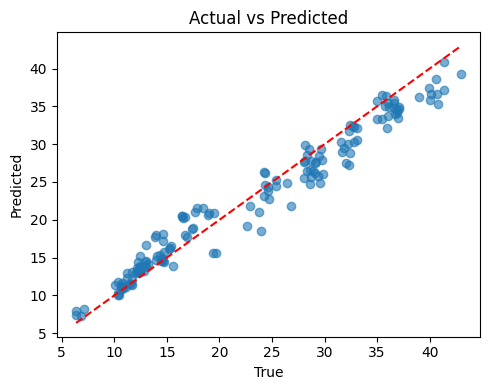

In [ ]:
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
from skfuzzy.cluster import cmeans  
import matplotlib.pyplot as plt  

def load_energy_efficiency_data(path="data/ENB2012_data.xlsx"):
    return pd.read_excel(path) 

class ANFIS:
    def __init__(self, n_clusters, X, m=2.0, error=0.005, maxiter=1000):  # X input data shape (N, F)
        self.n_clusters, self.n_features = n_clusters, X.shape[1]  # set sizes
        # perform fuzzy c-means clustering: data input as features x samples
        cntr, u, _, _, _, _, _ = cmeans(
            data=X.T,
            c=n_clusters,
            m=m,
            error=error,
            maxiter=maxiter,
            init=None,
            seed=42
        )
        self.centers = cntr  # center shape (K, F)
        # compute std devs per cluster-feature from FCM membership
        U = u.T  # (N, K)
        Um = U**m  # (N, K)
        diffs = X[:, None, :] - self.centers[None, :, :]  # (N, K, F)
        var = (Um[:, :, None] * (diffs**2)).sum(axis=0) / Um.sum(axis=0)[:, None]  # (K, F)
        self.stds = np.maximum(np.sqrt(var), 0.1)  # avoid zero

    def _membership(self, X):
        # compute Gaussian membership for all samples/clusters
        diffs = X[:, None, :] - self.centers[None, :, :]  # broadcast diff
        sq = diffs**2 / (2 * self.stds[None, :, :]**2)  # Distance term
        M = np.exp(-sq.sum(axis=2))  # sum over features -> (N,K)
        return M / M.sum(axis=1, keepdims=True)  # normalize memberships

    def fit(self, X, y, Xv, yv, epochs=100, lr=1e-4, patience=20):
        N = X.shape[0]
        best_mse, wait = np.inf, 0  # early-stopping trackers
        for ep in range(epochs):
            M = self._membership(X)  # (N,K)
            theta = np.linalg.lstsq(M, y, rcond=None)[0]  # Θ = argmin||MΘ−y||
            self.w = theta
            y_pred = M @ self.w
            mse = mean_squared_error(y, y_pred)

            Mv = self._membership(Xv)
            val_mse = mean_squared_error(yv, Mv @ self.w)
            print(f"Epoch {ep+1}, Train MSE: {mse:.4f}, Val MSE: {val_mse:.4f}", flush=True)

            # vectorized gradients for centers and stds
            err = (y - y_pred)[:, None, None]
            diffs = X[:, None, :] - self.centers[None, :, :]
            dM_dc = M[:,:,None] * diffs / (self.stds[None,:,:]**2)
            dM_ds = M[:,:,None] * diffs**2 / (self.stds[None,:,:]**3)
            dY_dc = dM_dc * self.w[None,:,None]
            dY_ds = dM_ds * self.w[None,:,None]
            grad_c = -2/N * (err * dY_dc).sum(axis=0)
            grad_s = -2/N * (err * dY_ds).sum(axis=0)
            grad_c = np.clip(grad_c, -1,1)
            grad_s = np.clip(grad_s, -0.5,0.5)

            self.centers -= lr * grad_c
            self.stds = np.maximum(self.stds - lr * grad_s, 0.1)

            if val_mse < best_mse:
                best_mse, wait = val_mse, 0
            else:
                wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {ep+1}, best Val MSE: {best_mse:.4f}", flush=True)
                break

    def predict(self, X):
        M = self._membership(X)
        return M @ self.w

    def test(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        print(f"Test MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}", flush=True)

        plt.figure(figsize=(5, 4))
        plt.scatter(y, y_pred, alpha=0.6)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
        plt.title('Actual vs Predicted')
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.tight_layout()
        plt.show()

        return mse, rmse, mae, r2

if __name__ == '__main__':
    df = load_energy_efficiency_data()  # load data
    X = df.iloc[:,:8].values; y = df.iloc[:,8].values
    Xt, Xs, yt, ys = train_test_split(X, y, test_size=0.2, random_state=42)
    sc = StandardScaler().fit(Xt); Xt, Xs = sc.transform(Xt), sc.transform(Xs)
    Xtr, Xv, ytr, yv = train_test_split(Xt, yt, test_size=0.1, random_state=42)

    model = ANFIS(n_clusters=50, X=Xtr)  # init ANFIS with FCM centers
    model.fit(Xtr, ytr, Xv, yv, epochs=100, lr=0.01, patience=15)
    model.test(Xs, ys)  # evaluate


# The end

------
------